In [2]:
from sympy import *
init_printing(use_unicode=False, wrap_line=False);

This file derives the inflow velocity boundary condition, used for the plume

In [3]:
x=Symbol('x');
y=Symbol('y');
xc=Symbol('xc');
yc=Symbol('yc');
xmax=Symbol('xmax');
xmin=Symbol('xmin');
ymax=Symbol('ymax');
ymin=Symbol('ymin');
c = Symbol('c');
V_in = Symbol('V_in');
V_out = Symbol('V_out');
dV = Symbol('dV');


**2D expression**




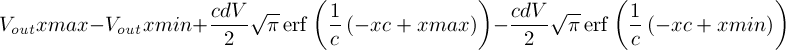

In [4]:
integrate(V_out+ dV*exp(- (x-xc)**2/c**2  ), (x,xmin, xmax))


In [5]:
a=integrate( V_out+ dV*exp(- (x-xc)**2/c**2  ), (x,xmin, xmax))
print(a)

V_out*xmax - V_out*xmin + sqrt(pi)*c*dV*erf((-xc + xmax)/c)/2 - sqrt(pi)*c*dV*erf((-xc + xmin)/c)/2


In [6]:
ccode(a)

'V_out*xmax - V_out*xmin + (1.0L/2.0L)*sqrt(M_PI)*c*dV*erf((-xc + xmax)/c) - 1.0L/2.0L*sqrt(M_PI)*c*dV*erf((-xc + xmin)/c)'

**3D expression**

Note that sympy has troubles to do the full integral with (x-xc) and (y-yc). 
Yet, we can look @ the analogy of what we have above 

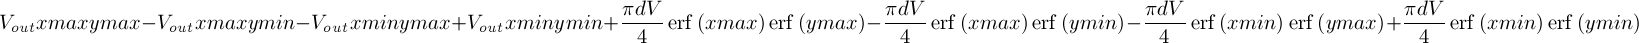

In [24]:
integrate(V_out+ dV*exp(- (x**2+y**2)  ), (x,xmin,xmax),(y,ymin,ymax))

In [26]:
a=integrate(V_out+ dV*exp(- (x**2+y**2)  ), (x,xmin,xmax),(y,ymin,ymax))
ccode(a)

'V_out*xmax*ymax - V_out*xmax*ymin - V_out*xmin*ymax + V_out*xmin*ymin + (1.0L/4.0L)*M_PI*dV*erf(xmax)*erf(ymax) - 1.0L/4.0L*M_PI*dV*erf(xmax)*erf(ymin) - 1.0L/4.0L*M_PI*dV*erf(xmin)*erf(ymax) + (1.0L/4.0L)*M_PI*dV*erf(xmin)*erf(ymin)'

<bound method Integral.doit of Integral(Integral(V_out + dV*exp((-(x - xc)**2 - (y - yc)**2)/c**2), x), y)>